# TEST OF *INSERT MODEL NAME*

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
data = pd.read_parquet('./data/train.parquet')
data.iloc[81,:]

counter_id                        100007049-102007049
counter_name                 28 boulevard Diderot E-O
site_id                                     100007049
site_name                        28 boulevard Diderot
bike_count                                        0.0
date                              2020-09-08 04:00:00
counter_installation_date         2013-01-18 00:00:00
counter_technical_id                      Y2H15027244
latitude                                    48.846028
longitude                                    2.375429
log_bike_count                                    0.0
Name: 48495, dtype: object

In [4]:
data.loc[:,'date_days'] = data.loc[:,'date'].dt.strftime('%Y-%m-%d')

grouped_data = data.groupby(["counter_name",'date_days']).sum()
days_no_one_passed = grouped_data[grouped_data['bike_count']==0]
broken_counters = days_no_one_passed.groupby(["counter_name"]).mean()
list_broken_counters = broken_counters.index.get_level_values(0).tolist()
list_broken_counters

['152 boulevard du Montparnasse E-O',
 '152 boulevard du Montparnasse O-E',
 '20 Avenue de Clichy NO-SE',
 '20 Avenue de Clichy SE-NO',
 '254 rue de Vaugirard NE-SO',
 '254 rue de Vaugirard SO-NE',
 'Voie Georges Pompidou NE-SO',
 'Voie Georges Pompidou SO-NE']

In [5]:
data.loc[data['log_bike_count']== 0]

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,counter_technical_id,latitude,longitude,log_bike_count,date_days
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.0,2020-09-01
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.0,2020-09-01
48339,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 23:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.0,2020-09-01
48342,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-02 04:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.0,2020-09-02
48360,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-02 20:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.0,2020-09-02
...,...,...,...,...,...,...,...,...,...,...,...,...
927228,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,0.0,2021-06-25 02:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,0.0,2021-06-25
927406,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,0.0,2021-06-22 02:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,0.0,2021-06-22
928156,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,0.0,2021-07-25 04:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,0.0,2021-07-25
928192,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,0.0,2021-07-27 00:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,0.0,2021-07-27


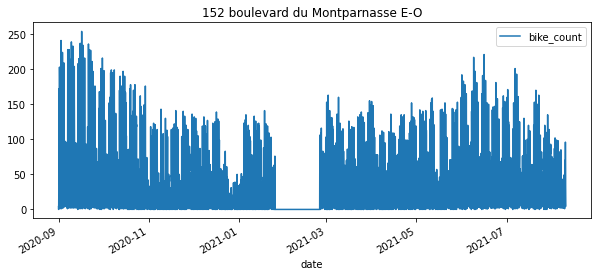

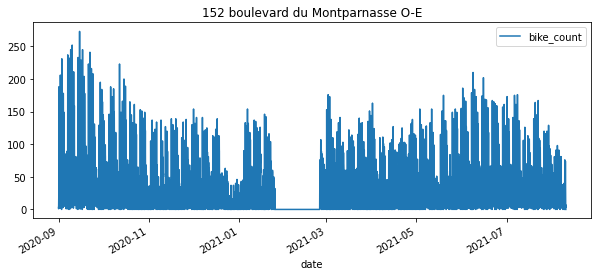

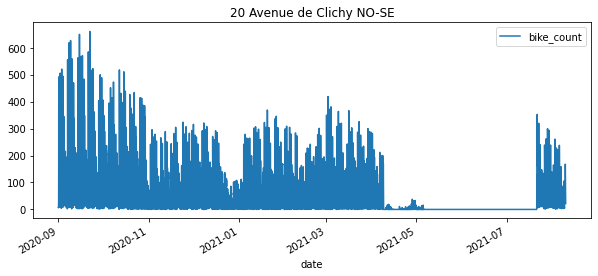

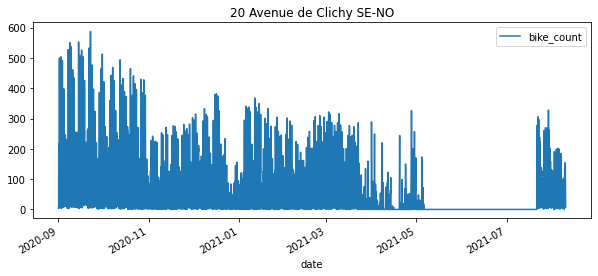

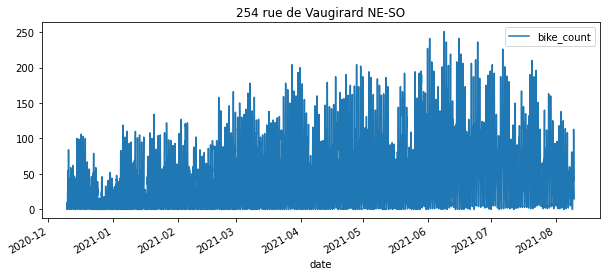

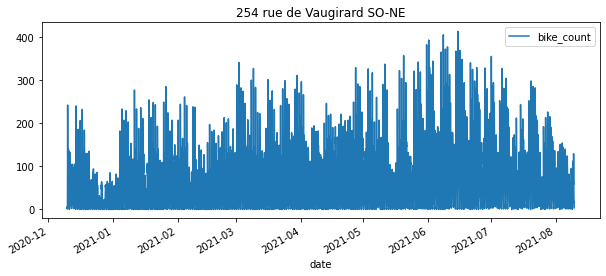

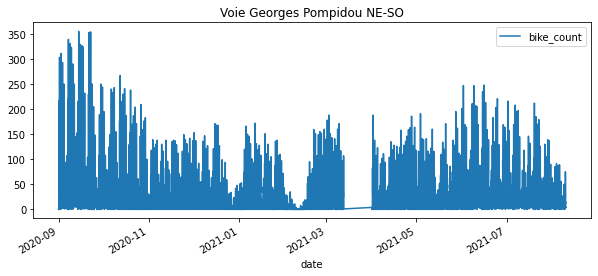

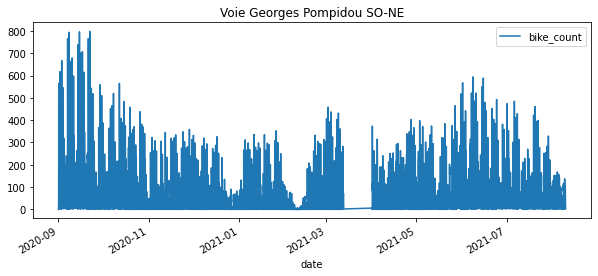

In [6]:
for each_counter in list_broken_counters:
    fig, ax = plt.subplots(figsize=(10, 4))

    mask = ((data['counter_name'] == each_counter))

    data[mask].plot(x='date', y='bike_count', ax=ax, title=each_counter)

In [92]:
#mask = (data['counter_name']=='152 boulevard du Montparnasse E-O'
 #       & 
  #          ( (data['date'] > pd.to_datetime('2021/01/24')) & (data['date'] < pd.to_datetime('2021/02/24') ) )
   #     )

mask1 = (data['counter_name']=='152 boulevard du Montparnasse E-O') & (data['date'] >= pd.to_datetime('2021/01/26')) & (data['date'] <= pd.to_datetime('2021/02/24'))
mask1bis = (data['counter_name']=='152 boulevard du Montparnasse O-E') & (data['date'] >= pd.to_datetime('2021/01/26')) & (data['date'] <= pd.to_datetime('2021/02/24'))
mask2 = (data['counter_name']=='20 Avenue de Clichy SE-NO') & (data['date'] >= pd.to_datetime('2021/05/06')) & (data['date'] <= pd.to_datetime('2021/07/21'))
mask2bis = (data['counter_name']=='20 Avenue de Clichy NO-SE') & (data['date'] >= pd.to_datetime('2021/05/06')) & (data['date'] <= pd.to_datetime('2021/07/21'))
#mask3 = (data['counter_name']=='Voie Georges Pompidou NE-SO') & (data['date'] >= pd.to_datetime('2021/03/15')) & (data['date'] <= pd.to_datetime('2021/04/01'))
#mask3bis = (data['counter_name']=='Voie Georges Pompidou SO-NE') & (data['date'] >= pd.to_datetime('2021/03/15')) & (data['date'] <= pd.to_datetime('2021/04/01'))

#Pour le 3 ce ne sont pas des fausses mais des missing valeus


# ['152 boulevard du Montparnasse E-O',
# '152 boulevard du Montparnasse O-E',
# '20 Avenue de Clichy NO-SE',
# '20 Avenue de Clichy SE-NO',
# '254 rue de Vaugirard NE-SO',
# '254 rue de Vaugirard SO-NE',
# 'Voie Georges Pompidou NE-SO',
# 'Voie Georges Pompidou SO-NE']

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,counter_technical_id,latitude,longitude,log_bike_count,date_days
121265,100042374-110042374,Voie Georges Pompidou NE-SO,100042374,Voie Georges Pompidou,0.0,2021-04-01 00:00:00,2017-12-15,Y2H21025335,48.8484,2.27586,0.000000,2021-04-01
122776,100042374-110042374,Voie Georges Pompidou NE-SO,100042374,Voie Georges Pompidou,4.0,2021-03-31 22:00:00,2017-12-15,Y2H21025335,48.8484,2.27586,1.609438,2021-03-31
122779,100042374-110042374,Voie Georges Pompidou NE-SO,100042374,Voie Georges Pompidou,4.0,2021-03-31 23:00:00,2017-12-15,Y2H21025335,48.8484,2.27586,1.609438,2021-03-31


In [95]:
def counters_done(X):
    print(X.shape)
    mask1 = (data['counter_name']=='152 boulevard du Montparnasse E-O') & (data['date'] >= pd.to_datetime('2021/01/26')) & (data['date'] <= pd.to_datetime('2021/02/24'))
    mask1bis = (data['counter_name']=='152 boulevard du Montparnasse O-E') & (data['date'] >= pd.to_datetime('2021/01/26')) & (data['date'] <= pd.to_datetime('2021/02/24'))
    mask2 = (data['counter_name']=='20 Avenue de Clichy SE-NO') & (data['date'] >= pd.to_datetime('2021/05/06')) & (data['date'] <= pd.to_datetime('2021/07/21'))
    mask2bis = (data['counter_name']=='20 Avenue de Clichy NO-SE') & (data['date'] >= pd.to_datetime('2021/05/06')) & (data['date'] <= pd.to_datetime('2021/07/21'))
    X.drop(X[mask1].index, inplace=True)
    X.drop(X[mask1bis].index, inplace=True)
    X.drop(X[mask2].index, inplace=True)
    X.drop(X[mask2bis].index, inplace=True)
    print(X.shape)
    return X

counters_done(data)

(455163, 12)


/var/folders/7l/vp4hkxqx6m9901fw5fydkvww0000gn/T/ipykernel_33119/3673547077.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X.drop(X[mask1bis].index, inplace=True)
/var/folders/7l/vp4hkxqx6m9901fw5fydkvww0000gn/T/ipykernel_33119/3673547077.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X.drop(X[mask2].index, inplace=True)
/var/folders/7l/vp4hkxqx6m9901fw5fydkvww0000gn/T/ipykernel_33119/3673547077.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X.drop(X[mask2bis].index, inplace=True)


(450119, 12)


,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,counter_technical_id,latitude,longitude,log_bike_count,date_days
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,2020-09-01
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.693147,2020-09-01
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,0.000000,2020-09-01
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,1.609438,2020-09-01
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,Y2H15027244,48.846028,2.375429,2.302585,2020-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...
928450,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,51.0,2021-08-08 18:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,3.951244,2021-08-08
928453,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,1.0,2021-08-09 02:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,0.693147,2021-08-09
928456,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,61.0,2021-08-09 08:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,4.127134,2021-08-09
928459,300014702-353245971,254 rue de Vaugirard SO-NE,300014702,254 rue de Vaugirard,44.0,2021-08-09 10:00:00,2020-11-29,Y2H20114504,48.839770,2.301980,3.806662,2021-08-09
